## Observations and Insights 

# 1. Based on the data analysed, one significant observation is the significant variance between the 4 observed drug regimens. Capomulin and Ramicane have significantly lower tumor volumes compared the Infubinol and Ceftamin - particularly when viewed against the boxplot graph. 

# 2. Ramicane and Capomulin had the lowest varaiance, standard drivation respectfully. Interestingly, the SEM was almost identical - in saying this, all other drug regimens were significantly higher - this was viewed in the summary statistics. 

# 3. While not easily shown using the one data set - the line graph data is showing that while most mice responded positively to the treatment (Capomulin), analysis of multiple mice show that there is a trend occuring in the last 2-4 samples that the tumor size is beginning to increase once again. This is seen on the line graph.

# 4. In the bar charts, we can see that Capomulin and Ramicane have a significantly larger number of samples, this can be interpreted that the other regimens are not as effecitve (as all regimens had the same number of mice, it is presumed that more mice have died when on the other regimens) - this is seen on the bar charts.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_df = pd.DataFrame(mouse_metadata, columns=["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)"])
study_results_df = pd.DataFrame(study_results, columns=["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"])
merged_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
#---------------
# Create variable and calculate a total
totalmicecount = merged_df["Mouse ID"].nunique()
totalmicecount

249

In [3]:
## Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#---------------
# Add a concatenated value to the list
merged_df["Concat"] = merged_df["Mouse ID"] + "-" + merged_df["Timepoint"].astype(str)
merged_df

# Count the total number of concatenated values
concatmouse = merged_df["Concat"].value_counts() > 1
concatmouse.head(10)

g989-15     True
g989-5      True
g989-10     True
g989-0      True
g989-20     True
j365-40    False
i557-10    False
u196-40    False
l490-5     False
x822-40    False
Name: Concat, dtype: bool

In [4]:
## Optional: Get all the data for the duplicate mouse ID.
#---------------
# Amend query to look at the 'dirty' mouse...
dirty_mouse = merged_df[merged_df['Mouse ID'] == 'g989']
dirty_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Concat
908,g989,Propriva,Female,21,26,0,45.000000,0,g989-0
909,g989,Propriva,Female,21,26,0,45.000000,0,g989-0
910,g989,Propriva,Female,21,26,5,48.786801,0,g989-5
911,g989,Propriva,Female,21,26,5,47.570392,0,g989-5
912,g989,Propriva,Female,21,26,10,51.745156,0,g989-10
913,g989,Propriva,Female,21,26,10,49.880528,0,g989-10
914,g989,Propriva,Female,21,26,15,51.325852,1,g989-15
915,g989,Propriva,Female,21,26,15,53.442020,0,g989-15
916,g989,Propriva,Female,21,26,20,55.326122,1,g989-20
917,g989,Propriva,Female,21,26,20,54.657650,1,g989-20


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#---------------
# Remove the duplicated mouse from the data (Mouse ID = g989)
clean_mouse_data = merged_df[merged_df['Mouse ID'] != 'g989']
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Concat
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403-0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403-5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403-10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403-15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403-20
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z969-25
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z969-30
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z969-35
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z969-40


In [6]:
#---------------
# Checking the number of mice in the clean DataFrame
revisedmicecount = clean_mouse_data["Mouse ID"].nunique()
revisedmicecount

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
#---------------
# Calculate all variables
mean_tumorvol = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumorvol = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_tumorvol = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
stdev_tumorvol = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumorvol = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Create the grouping for drug reigmen
drug_regimen = clean_mouse_data["Drug Regimen"].value_counts()

# Create the dataframe for summary statistics 
tumorvol_summarystats = pd.DataFrame(
    {"Mean": mean_tumorvol,
     "Median": median_tumorvol,
     "Variance": var_tumorvol,
     "St. Dev.": stdev_tumorvol,
     "SEM": sem_tumorvol
    }
)   

# Add formatting
tumorvol_summarystats["Mean"] = tumorvol_summarystats["Mean"].astype(float).map("{:,.2f}".format)
tumorvol_summarystats["Median"] = tumorvol_summarystats["Median"].astype(float).map("{:,.2f}".format)
tumorvol_summarystats["Variance"] = tumorvol_summarystats["Variance"].astype(float).map("{:,.2f}".format)
tumorvol_summarystats["St. Dev."] = tumorvol_summarystats["St. Dev."].astype(float).map("{:,.2f}".format)
tumorvol_summarystats["SEM"] = tumorvol_summarystats["SEM"].astype(float).map("{:,.2f}".format)

# Display table
tumorvol_summarystats


,Mean,Median,Variance,St. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
#---------------
# Use Agg Function to summarise the calculations
mouse_summary_stats2 = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

mouse_summary_stats2.round(2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

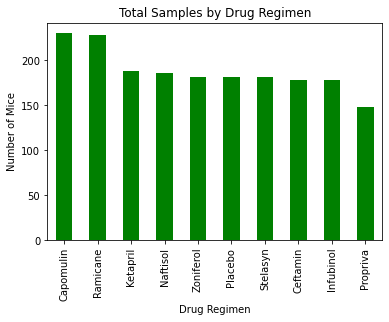

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#---------------
# Import the data, create new column for count, then group by "Drug Regimen" 
counts = clean_mouse_data["Drug Regimen"].value_counts()

counts.head()

# Plot the chart
counts.plot(kind="bar", color='Green', sort_columns=True)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.title("Total Samples by Drug Regimen")
plt.savefig("Images/Pandas_Bar.png")
plt.show()

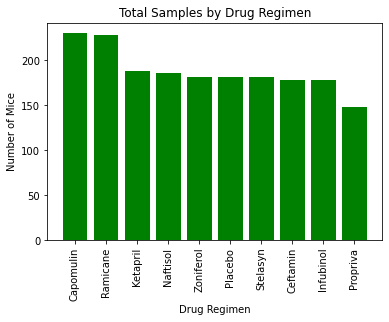

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#---------------
# Carry over Variable
counts = clean_mouse_data["Drug Regimen"].value_counts()

# Plot the chart
plt.bar(counts.index, counts.values, color='Green', alpha=1, align="center")

# Give our chart some labels
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("Number of Mice");
plt.title("Total Samples by Drug Regimen")
plt.savefig("Images/PyPlot_Bar.png")

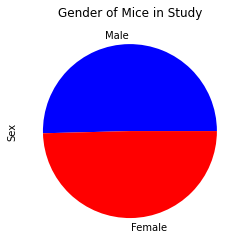

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#---------------
# Identify the Unique Mouse ID's
gender_analysis = clean_mouse_data
gender_analysis = gender_analysis.drop_duplicates(subset="Mouse ID", keep='first')

gender_analysis

# #Create a new variable for gender count 
gender_count = gender_analysis["Sex"].value_counts()
gender_count

# Add Panda Pie Plot and print
gender_count.plot(kind="pie", y=gender_count.values, colors=["b", "r"],)
plt.title("Gender of Mice in Study")
plt.savefig("Images/Pandas_Pie.png");

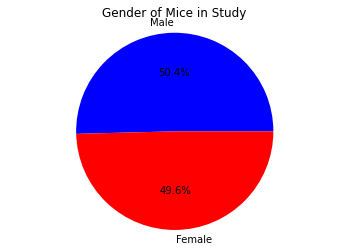

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#---------------
plt.pie(gender_count.values, labels=["Male", "Female"], colors=["b", "r"],
        autopct="%1.1f%%")
plt.axis("equal")
plt.title("Gender of Mice in Study")
plt.savefig("Images/PyPlot_Pie.png");

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#---------------
# Start by getting the last (greatest) timepoint for each mouse
max_timepont_df = pd.DataFrame(clean_mouse_data.groupby(["Mouse ID"])["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_tp_df = pd.merge(clean_mouse_data, max_timepont_df, on=["Mouse ID", "Timepoint"],how="inner")

# Keep only data for Capomulin, Ramicane, Infubinol, and Ceftamin treatments
selected_treatments = merged_tp_df.loc[merged_tp_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
selected_treatments = selected_treatments.set_index(["Drug Regimen"])
selected_treatments

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Concat
Drug Regimen,,,,,,,,
Ramicane,k403,Male,21,16,45,22.050126,1,k403-45
Capomulin,s185,Female,3,17,45,23.343598,1,s185-45
Capomulin,x401,Female,16,15,45,28.484033,0,x401-45
Capomulin,m601,Male,22,17,45,28.430964,1,m601-45
Ramicane,g791,Male,11,16,45,29.128472,1,g791-45
...,...,...,...,...,...,...,...,...
Ceftamin,x822,Male,3,29,45,61.386660,3,x822-45
Infubinol,y163,Female,17,27,45,67.685569,3,y163-45
Ceftamin,y769,Female,6,27,45,68.594745,4,y769-45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#---------------
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Loop through to store tumor volume
for drug in treatment_list:
    #vol = selected_treatments["Tumor Volume (mm3)"].loc[selected_treatments.index]
    vol = merged_tp_df.loc[merged_tp_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']

    tumor_vol_list.append(vol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq

    print(f"{drug}")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The IQR of {drug} is: {iqr}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"\n")

Capomulin
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The IQR of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


Ramicane
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The IQR of Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


Infubinol
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The IQR of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


Ceftamin
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The IQR of Ceftamin is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.




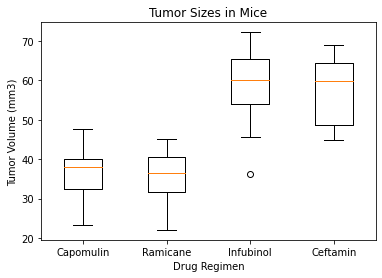

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#---------------
treatment_list, ax1 = plt.subplots()
ax1.set_title("Tumor Sizes in Mice")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_list)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.savefig("Images/PyPlot_BoxPlot.png");

## Line and Scatter Plots

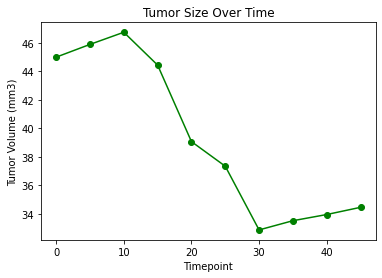

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#---------------
# Create a new DF
mouse_t565 = clean_mouse_data.set_index("Mouse ID")
mouse_t565 = mouse_t565.loc[["t565"]]

# Create Line Plot
plt.plot(mouse_t565["Timepoint"], mouse_t565["Tumor Volume (mm3)"], marker="o", color="green")

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Size Over Time")
plt.savefig("Images/PyPlot_Line.png");

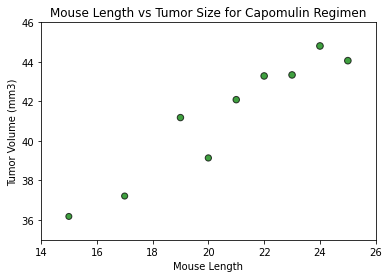

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#---------------

# Create a new DF
Capomulin = clean_mouse_data.set_index("Drug Regimen")
Capomulin = Capomulin.loc[["Capomulin"]]
Capomulin = Capomulin.groupby(Capomulin["Weight (g)"])["Tumor Volume (mm3)"].agg(['mean'])
Capomulin.head(99)

scatter_data = Capomulin["mean"]
x_values = scatter_data.index
y_values = scatter_data.values

# Create Scatter Plot
plt.scatter(scatter_data.index, scatter_data.values, marker="o", facecolors="green", edgecolors="black", s=scatter_data.values, alpha=0.75)
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Length vs Tumor Size");

# Setting Plot Labels and formatting
plt.xlabel("Mouse Length")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Length vs Tumor Size for Capomulin Regimen")
plt.ylim(35, 46)
plt.xlim(14, 26)
plt.savefig("Images/PyPlot_Scatter.png");

## Correlation and Regression

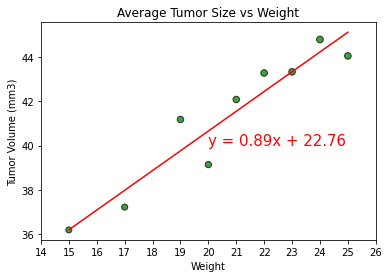

In [27]:
# Calculate the correlation coefficient and linear regression model 
# # for mouse weight and average tumor volume for the Capomulin regimen
# #---------------
Capomulin = clean_mouse_data.set_index("Drug Regimen")
Capomulin = Capomulin.loc[["Capomulin"]]
Capomulin = Capomulin.groupby(Capomulin["Weight (g)"])["Tumor Volume (mm3)"].agg(['mean'])
Capomulin.head(99)

# Create the variable for the consolidated data
scatter_data = Capomulin["mean"]

# Calculate the linear regression
x_values = scatter_data.index
y_values = scatter_data.values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black", s=scatter_data.values, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.xticks(ticks=[14, 15, 16, 17 ,18, 19, 20, 21, 22, 23, 24, 25, 26])
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Tumor Size vs Weight")
plt.savefig("Images/PyPlot_Scatter - Correlation.png");